In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer

from sklearn.metrics import (
        classification_report, confusion_matrix, r2_score, mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
)

from sklearn.inspection import PartialDependenceDisplay

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from xgboost import XGBClassifier, XGBRegressor, plot_importance
from sklearn.model_selection import cross_val_score

In [4]:
from category_encoders import TargetEncoder 
from sklearn.feature_selection import SelectFromModel

In [5]:
# from sklearn.datasets import make_classification

In [6]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 

In [8]:
from feature_engine.imputation import CategoricalImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor

In [9]:
from xgbimputer import XGBImputer

In [10]:
TrainPre2019 = pd.read_csv('../data/Pre2019_df_Cat9999999.csv')

/var/folders/nl/hqcw9pqd0ns4q0b61syv0q2m0000gn/T/ipykernel_17602/2282598049.py:1: DtypeWarning: Columns (17,41,44) have mixed types. Specify dtype option on import or set low_memory=False.
  TrainPre2019 = pd.read_csv('../data/Pre2019_df_Cat9999999.csv')


In [11]:
TrainPre2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949528 entries, 0 to 949527
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0.1                    949528 non-null  int64  
 1   Unnamed: 0                      949528 non-null  int64  
 2   RecordID                        949528 non-null  int64  
 3   ESS_Id                          949528 non-null  int64  
 4   EventTimeStamp                  949528 non-null  object 
 5   eventDescription                902364 non-null  object 
 6   actionDescription               0 non-null       float64
 7   ecuSoftwareVersion              747330 non-null  object 
 8   ecuSerialNumber                 707932 non-null  object 
 9   ecuModel                        900949 non-null  object 
 10  ecuMake                         900949 non-null  object 
 11  ecuSource                       949528 non-null  int64  
 12  spn             

**Goal:** Predict the rank based on the total shots.

In [12]:
TrainPre2019['time_interval_to_SPN5246_class'].value_counts()

time_interval_to_SPN5246_class
9999999    715686
0          229509
1            2233
2            1263
3             837
Name: count, dtype: int64

In [13]:
TrainPre2019

,Unnamed: 0.1,Unnamed: 0,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,...,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,spn_fmi,is_fullderate,is_fullderate_group,EquipID_Index,time_to_next_SPN5246,time_interval_to_SPN5246_class
0,43931,48303,49415,2363162,2015-05-11 13:11:20,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,...,4.475814,3276.75,14.4,0.58,639.0_2.0,0,0,301_0,1.027800e+04,0
1,45693,50251,51363,2400445,2015-05-13 08:22:32,Condition Exists Cruise Control Enable Switch,NaN,unknown,unknown,unknown,...,64.637170,3276.75,89.6,4.64,596.0_31.0,0,0,301_0,1.023481e+04,0
2,50271,55260,57330,2482983,2015-05-18 09:34:05,Abnormal Rate of Change Aftertreatment 1 Outle...,NaN,PC4__1284P4C_2*,6U13D13,MX,...,63.525490,3276.75,0.0,20.30,3226.0_10.0,0,0,301_0,1.011362e+04,0
3,54326,59636,61706,2554027,2015-05-21 13:57:35,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,...,4.364162,3276.75,12.0,1.45,639.0_2.0,0,0,301_0,1.003723e+04,0
4,54418,59731,61801,2555325,2015-05-21 14:54:32,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,...,NaN,NaN,NaN,NaN,639.0_2.0,0,0,301_0,1.003628e+04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949523,4036,4494,4495,1052146,2015-02-24 16:24:05,Low (Severity Medium) Catalyst Tank Level,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,...,NaN,NaN,NaN,NaN,1761.0_18.0,0,0,R1762_0,2.400000e+08,9999999
949524,5907,6438,6439,1089561,2015-02-26 13:12:11,NaN,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,...,2.058292,3276.75,0.0,0.29,5848.0_9.0,0,0,R1762_0,2.400000e+08,9999999
949525,5915,6446,6447,1090499,2015-02-26 13:50:59,NaN,NaN,05317106*04119044*051914190353*09400015*G1*BDR*,79751302,6X1u13D1500000000,...,NaN,NaN,NaN,NaN,5848.0_9.0,0,0,R1762_0,2.400000e+08,9999999
949526,4472,4952,4953,1059704,2015-02-25 06:08:43,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,unknown,unknown,unknown,...,4.378725,3276.75,0.0,1.74,639.0_2.0,0,0,R1764_0,2.400000e+08,9999999



class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = OneHotEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = OneHotEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [14]:
TrainPre2019[['ecuSource', 'LampStatus', 'time_interval_to_SPN5246_class', 'ecuSerialNumber', 'ecuModel', 'ecuMake']] = TrainPre2019[['ecuSource', 'LampStatus', 'time_interval_to_SPN5246_class', 'ecuSerialNumber', 'ecuModel', 'ecuMake']].astype('category')

In [15]:
TrainPre2019[['activeTransitionCount']] = TrainPre2019[['activeTransitionCount']].astype('category')

In [16]:
TrainPre2019.replace(to_replace='3276,75', value='3278.75', inplace=True)

In [17]:
TrainPre2019[[  'AcceleratorPedal',
                    'BarometricPressure',
                    'CruiseControlSetSpeed',
                    'DistanceLtd',
                    'EngineCoolantTemperature',
                    'EngineLoad',
                    'EngineOilPressure',
                    'EngineOilTemperature',
                    'EngineRpm',
                    'EngineTimeLtd',
                    'FuelLevel',
                    'FuelLtd',
                    'FuelRate',
                    'FuelTemperature',
                    'IntakeManifoldTemperature',
                    'Speed',
                    'Throttle',
                    'active',
                    'TurboBoostPressure',
                    'CruiseControlActive',
                    'IgnStatus',
                    'ParkingBrake',
                    'SwitchedBatteryVoltage'
]] = TrainPre2019[[                         'AcceleratorPedal',
                                            'BarometricPressure',
                                            'CruiseControlSetSpeed',
                                            'DistanceLtd',
                                            'EngineCoolantTemperature',
                                            'EngineLoad',
                                            'EngineOilPressure',
                                            'EngineOilTemperature',
                                            'EngineRpm',
                                            'EngineTimeLtd',
                                            'FuelLevel',
                                            'FuelLtd',
                                            'FuelRate',
                                            'FuelTemperature',
                                            'IntakeManifoldTemperature',
                                            'Speed',
                                            'Throttle',
                                            'active',
                                            'TurboBoostPressure',
                                            'CruiseControlActive',
                                            'IgnStatus',
                                            'ParkingBrake',
                                            'SwitchedBatteryVoltage'
                     ]].astype('float64')

In [18]:
NumericColumns = TrainPre2019.select_dtypes(include=[np.number]).columns.tolist()
NumericColumns_Without_MatchID = NumericColumns.pop(0)
NumericColumns

['Unnamed: 0',
 'RecordID',
 'ESS_Id',
 'actionDescription',
 'spn',
 'fmi',
 'active',
 'faultValue',
 'MCTNumber',
 'Latitude',
 'Longitude',
 'FaultId',
 'AcceleratorPedal',
 'BarometricPressure',
 'CruiseControlActive',
 'CruiseControlSetSpeed',
 'DistanceLtd',
 'EngineCoolantTemperature',
 'EngineLoad',
 'EngineOilPressure',
 'EngineOilTemperature',
 'EngineRpm',
 'EngineTimeLtd',
 'FuelLevel',
 'FuelLtd',
 'FuelRate',
 'FuelTemperature',
 'IgnStatus',
 'IntakeManifoldTemperature',
 'ParkingBrake',
 'ServiceDistance',
 'Speed',
 'SwitchedBatteryVoltage',
 'Throttle',
 'TurboBoostPressure',
 'is_fullderate',
 'is_fullderate_group',
 'time_to_next_SPN5246']

Among numeric columns, will keep:


['AcceleratorPedal',
'BarometricPressure',
'CruiseControlSetSpeed',
'DistanceLtd',
'EngineCoolantTemperature',
'EngineLoad',
'EngineOilPressure',
'EngineOilTemperature',
'EngineRpm',
'EngineTimeLtd',
'FuelLevel',
'FuelLtd',
'FuelRate',
'FuelTemperature',
'IntakeManifoldTemperature',
'Speed',
'Throttle',
'active',
'TurboBoostPressure',
'activeTransitionCount',
'CruiseControlActive',
'IgnStatus',
'ParkingBrake',
'SwitchedBatteryVoltage']

In [19]:
NonNumericColumns = TrainPre2019.select_dtypes(exclude=[np.number]).columns.tolist()
NonNumericColumns

['EventTimeStamp',
 'eventDescription',
 'ecuSoftwareVersion',
 'ecuSerialNumber',
 'ecuModel',
 'ecuMake',
 'ecuSource',
 'activeTransitionCount',
 'EquipmentID',
 'LocationTimeStamp',
 'LampStatus',
 'spn_fmi',
 'EquipID_Index',
 'time_interval_to_SPN5246_class']

Among, non-numeric columns, will keep:

        ('target_encoder', TargetEncoder(handle_unknown='ignore'), [   'ecuSoftwareVersion',
                                                                        'ecuSerialNumber',
                                                                        'ecuModel',
                                                                        'ecuMake',
                                                                        'spn_fmi'
                                                                    ]),
        ('ordinal_encoder', OrdinalEncoder(handle_unknown='ignore'), [   'ecuSource',
                                                                                'LampStatus'
                                                                        ])

In [20]:
X = TrainPre2019.drop(columns = [   'Unnamed: 0',
                                    'Unnamed: 0.1',
                                    'RecordID',
                                    'ESS_Id',
                                    'actionDescription',
                                    'spn',
                                    'fmi',
                                    'faultValue',
                                    'MCTNumber',
                                    'Latitude',
                                    'Longitude',
                                    'is_fullderate',
                                    'is_fullderate_group',
                                    'time_to_next_SPN5246',
                                    'ServiceDistance',
                                    'EventTimeStamp',
                                    'eventDescription',
                                    'EquipmentID',
                                    'LocationTimeStamp',
                                    'EquipID_Index',
                                    'time_interval_to_SPN5246_class',
                                    'MCTNumber',                                  
                                    'FaultId',
                                    'ecuSoftwareVersion',
                                    'ecuSerialNumber',
                                    'ecuModel',
                                    'ecuMake'                                                                                      
                                ]
                      )
y = TrainPre2019['time_interval_to_SPN5246_class']

In [21]:
X['spn_fmi'] = X['spn_fmi'].str.replace('.0', '')

In [22]:
X

,ecuSource,active,activeTransitionCount,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,spn_fmi
0,11,1.0,127,14.4,13.9200,0.0,0.00000,120841.70,185.0,18.0,...,134.6,1.0,154.4,1279.0,0.0,4.475814,3276.75,14.4,0.58,639_2
1,49,1.0,3,89.6,14.4275,0.0,0.00000,121687.10,186.8,38.0,...,100.4,1.0,120.2,4351.0,0.0,64.637170,3276.75,89.6,4.64,596_31
2,0,1.0,6,0.0,14.3550,0.0,0.00000,123057.10,185.0,0.0,...,120.2,1.0,118.4,17407.0,0.0,63.525490,3276.75,0.0,20.30,3226_10
3,11,1.0,127,12.0,14.5725,0.0,0.00000,124496.50,183.2,14.0,...,109.4,1.0,107.6,1279.0,0.0,4.364162,3276.75,12.0,1.45,639_2
4,11,0.0,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1279.0,NaN,NaN,NaN,NaN,NaN,639_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949523,0,0.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,1761_18
949524,0,1.0,1,0.0,14.2100,0.0,66.48672,80838.70,134.6,11.0,...,32.0,1.0,84.2,17407.0,0.0,2.058292,3276.75,0.0,0.29,5848_9
949525,0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1023.0,NaN,NaN,NaN,NaN,NaN,5848_9
949526,11,1.0,127,21.6,14.4275,0.0,66.48672,83681.85,154.4,12.0,...,32.0,1.0,93.2,1279.0,0.0,4.378725,3276.75,0.0,1.74,639_2


In [23]:
y

0               0
1               0
2               0
3               0
4               0
           ...   
949523    9999999
949524    9999999
949525    9999999
949526    9999999
949527    9999999
Name: time_interval_to_SPN5246_class, Length: 949528, dtype: category
Categories (5, int64): [0, 1, 2, 3, 9999999]

In [24]:
X.describe()

,active,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,EngineOilPressure,EngineOilTemperature,...,FuelLtd,FuelRate,FuelTemperature,IgnStatus,IntakeManifoldTemperature,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure
count,949528.000000,426247.000000,476659.000000,466508.000000,467458.000000,476568.000000,476625.000000,476168.000000,476735.000000,475236.000000,...,476017.000000,475932.000000,248414.000000,494185.000000,476730.000000,303591.000000,475134.000000,102624.000000,320557.000000,474652.000000
mean,0.520453,28.544902,14.191954,0.096682,62.174458,364626.882789,169.566761,31.959878,33.453187,187.261404,...,50560.896556,4.627839,37.043151,0.995724,106.750817,0.283948,26.293766,3104.761359,66.074916,6.286150
std,0.499582,36.550423,1.195484,0.295525,12.239142,142701.441105,32.811442,30.635726,11.282650,61.171250,...,24171.307050,5.783522,23.152840,0.065249,25.476308,0.450913,28.208800,729.139651,46.345526,8.557188
min,0.000000,0.000000,3.045000,0.000000,0.000000,0.000000,-7.600000,0.000000,0.000000,-39.156250,...,0.000000,0.000000,17.600000,0.000000,-40.000000,0.000000,0.000000,7.650000,0.000000,0.000000
25%,0.000000,0.000000,14.210000,0.000000,64.622600,267338.900000,170.600000,11.000000,28.420000,179.937500,...,33494.638645,0.647223,32.000000,1.000000,89.600000,0.000000,0.000000,3276.750000,0.000000,0.580000
50%,1.000000,4.000000,14.355000,0.000000,66.486720,379825.250000,183.200000,19.000000,36.540000,202.775000,...,51938.602972,1.690706,32.000000,1.000000,109.400000,0.000000,9.699216,3276.750000,100.000000,2.030000
75%,1.000000,48.800000,14.500000,0.000000,66.486720,481544.650000,186.800000,48.000000,39.440000,214.531300,...,68751.040705,7.211920,32.000000,1.000000,125.600000,1.000000,59.933190,3276.750000,100.000000,8.700000
max,1.000000,100.000000,15.225000,1.000000,69.593570,649549.000000,406.400000,101.000000,145.000000,3212.544000,...,312737.574126,25.611560,231.800000,1.000000,264.200000,1.000000,158.447200,3278.750000,100.000000,63.220000


In [25]:
X

le_y = LabelEncoder()

y_fitted = le_y.fit(y)
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 321, shuffle=True, stratify = y_encoded)


# Apply SMOTE
smote = SMOTE(random_state=3434)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)    # might need another set of pipeline; alternatively, we can go with the following approach:

 

ct0 = ColumnTransformer(
        [('target_encoder', TargetEncoder(handle_unknown='ignore'), ['spn_fmi',
                                                                        'ecuSource',
                                                                        'LampStatus',
                                                                        'activeTransitionCount'
                                                                    ]
          )],
        remainder='passthrough')
        



xgbc_pipe = Pipeline(
    steps=[
        ('preprocessor0', ct0),
        ('StandardScaler', StandardScaler()),
        ('imputer', IterativeImputer(estimator = GradientBoostingRegressor(verbose=2, random_state=434), max_iter=100, random_state=343)),
        ('smote', SMOTE(random_state=344)),
        ('xgbc', XGBClassifier(# tree_method = "hist",                                
                               enable_categorical=True, 
                                eval_metric='mlogloss',
                                objective = 'multi:softmax',
                                num_class = 5,
                                device = "cuda",
                                random_state = 535                         
                            )
        )
    ]
).fit(X_train, y_train) 

y_pred = xgbc_pipe.predict(X_test)  





In [ ]:
 


ct = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [  'AcceleratorPedal',
                                        'BarometricPressure',
                                        'CruiseControlSetSpeed',
                                        'DistanceLtd',
                                        'EngineCoolantTemperature',
                                        'EngineLoad',
                                        'EngineOilPressure',
                                        'EngineOilTemperature',
                                        'EngineRpm',
                                        'EngineTimeLtd',
                                        'FuelLevel',
                                        'FuelLtd',
                                        'FuelRate',
                                        'FuelTemperature',
                                        'IntakeManifoldTemperature',
                                        'Speed',
                                        'Throttle',
                                        'active',
                                        'TurboBoostPressure',
                                        'CruiseControlActive',
                                        'IgnStatus',
                                        'ParkingBrake',
                                        'SwitchedBatteryVoltage'
                                        ]),
        ('target_encoder', TargetEncoder(handle_unknown='ignore'), [    'spn_fmi',
                                                                        'ecuSource',
                                                                        'LampStatus',
                                                                        'activeTransitionCount'
                                                                    ]) #,
      # ('ordinal_encoder', OrdinalEncoder(handle_unknown='ignore'), [   'ecuSource',
       #                                                                         'LampStatus'
        #                                                                ])
    ],
    remainder='passthrough' 
)

xgbc_pipe = Pipeline(
    steps=[
        ('preprocessor', ct),
        ('imputer', XGBImputer(categorical_features_index=[0, 2, -7, -1], replace_categorical_values_back=True, verbose=2)), 
       # ('imputer', IterativeImputer(estimator = GradientBoostingRegressor(verbose=2, random_state=434), max_iter=10, random_state=343)),
        ('xgbc', XGBClassifier( enable_categorical=True, 
                               # booster='gbtree', 
                                eval_metric='mlogloss',
                                objective = 'multi:softprob'
                            )
        )
    ]
).fit(X_train, y_train) 

y_pred = xgbc_pipe.predict(X_test)  
 




~ For Ref / Backup purposes ~


ct1 = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), [  'AcceleratorPedal',
                                        'BarometricPressure',
                                        'CruiseControlSetSpeed',
                                        'DistanceLtd',
                                        'EngineCoolantTemperature',
                                        'EngineLoad',
                                        'EngineOilPressure',
                                        'EngineOilTemperature',
                                        'EngineRpm',
                                        'EngineTimeLtd',
                                        'FuelLevel',
                                        'FuelLtd',
                                        'FuelRate',
                                        'FuelTemperature',
                                        'IntakeManifoldTemperature',
                                        'Speed',
                                        'Throttle',
                                        'active',
                                        'TurboBoostPressure',
                                        'CruiseControlActive',
                                        'IgnStatus',
                                        'ParkingBrake',
                                        'SwitchedBatteryVoltage'
                                        ]),

         ('num_imputer', IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=10, random_state=343), [ 
                                        'AcceleratorPedal',
                                        'BarometricPressure',
                                        'CruiseControlSetSpeed',
                                        'DistanceLtd',
                                        'EngineCoolantTemperature',
                                        'EngineLoad',
                                        'EngineOilPressure',
                                        'EngineOilTemperature',
                                        'EngineRpm',
                                        'EngineTimeLtd',
                                        'FuelLevel',
                                        'FuelLtd',
                                        'FuelRate',
                                        'FuelTemperature',
                                        'IntakeManifoldTemperature',
                                        'Speed',
                                        'Throttle',
                                        'active',
                                        'TurboBoostPressure',
                                        'CruiseControlActive',
                                        'IgnStatus',
                                        'ParkingBrake',
                                        'SwitchedBatteryVoltage',
                                        'spn_fmi',
                                        'ecuSource',
                                        'LampStatus',
                                        'activeTransitionCount'
                                        ]) 
    ],
    remainder='passthrough'
)

~ For Ref / Backup purposes ~


xgbc_pipe = Pipeline(
    steps=[
        ('preprocessor0', ct0),
        ('StandardScaler', StandardScaler()),
        ('imputer', IterativeImputer(estimator=ExtraTreesRegressor(), max_iter=10, random_state=343)),
        ('smote', SMOTE(random_state=3434)),
        ('xgbc', XGBClassifier( enable_categorical=True, 
                               # max_cat_to_onehot=1,
                                booster='gbtree', 
                                eval_metric='mlogloss',
                                objective = 'multi:softprob'
                            )
        )
    ]
).fit(X_train, y_train) 

y_pred = xgbc_pipe.predict(X_test)  

~ For Ref / Backup purposes ~

Other imputer methodologies to try: XGBImputer(), GradientBoostingRegressor(), ExtraTreesRegressor()

In [27]:
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, y_pred)}')
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R2: {r2_score(y_test, y_pred)}')

MSE: 2.5874485271660714
RMSE: 1.608554794579927
MAE: 0.6494370899287015
MAPE: 2617364820877839.0
R2: 0.11971951983303886


xgb = XGBClassifier(
                    eval_metric='mlogloss'
                    
                    ).fit(X_train, y_train)

In [28]:
le_y

LabelEncoder()

In [29]:
y_fitted

LabelEncoder()

In [30]:
y_encoded

array([0, 0, 0, ..., 4, 4, 4], shape=(949528,))

In [31]:
y

0               0
1               0
2               0
3               0
4               0
           ...   
949523    9999999
949524    9999999
949525    9999999
949526    9999999
949527    9999999
Name: time_interval_to_SPN5246_class, Length: 949528, dtype: category
Categories (5, int64): [0, 1, 2, 3, 9999999]


#RandomizedSearchCV

param_dist = {
    'max_depth': range(1, 10, 1),
    'min_child_weight':range(1, 6, 1),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample':[i/10.0 for i in range(1, 10)],
    'colsample_bytree':[i/10.0 for i in range(1, 10)],
    'n_estimators':stats.randint(1, 70),
    'gamma':[i/10.0 for i in range(0, 5)],
   # 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
    
}



# xgb_model = XGBClassifier()

# Create the RandomizedSearchCV object
cv = RepeatedStratifiedKFold(n_splits=10, shuffle=True, random_state=343)
random_search = RandomizedSearchCV(xgbc_pipe[1], param_distributions=param_dist, n_iter=20, cv=cv, scoring='precision_macro', verbose=2, n_jobs=-1, random_state=321)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)






In [32]:
accuracy_score(y_test, y_pred)

0.8362453003064674

In [33]:
confusion_matrix(y_test, y_pred)

array([[ 18296,     12,      7,      6,  27581],
       [    65,    109,     17,      0,    256],
       [    38,      4,     79,      3,    129],
       [     2,      0,      2,    136,     27],
       [  2925,      4,      6,     14, 140188]])

Without ExtraTrees Imputer or SMOTE + XGBClassifier(): 106/(71+106+14+256) = 0.23 precision score for Time Interval Class 1
With HistGradientBoostImputer + SMOTE + XGBClassifier(tree_method = "hist"): 0.6375838926 precision score for Time Interval Class 1
With GradientBoostImputer + SMOTE + XGBClassifier(tree_method = "hist"): ___ precision score for Time Interval Class 1
With GradientBoostImputer + SMOTE + XGBClassifier(): ___ precision score for Time Interval Class 1

In [34]:
print(classification_report(y_test, y_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.86      0.40      0.54     45902
           1       0.84      0.24      0.38       447
           2       0.71      0.31      0.43       253
           3       0.86      0.81      0.83       167
           4       0.83      0.98      0.90    143137

    accuracy                           0.84    189906
   macro avg       0.82      0.55      0.62    189906
weighted avg       0.84      0.84      0.81    189906



scores = cross_val_score(xgbc_pipe, X_test, y_test, cv=10, scoring='precision_macro')

print('Cross Validation Macro Precision Scores:', scores)

In [35]:
### Top Features' Importance

In [36]:
selection = SelectFromModel(xgbc_pipe[1], threshold=0.0001, prefit=True)

In [37]:
X_selected = selection.transform(X_train)
X_selected

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


array([[0, 0.0, 2, ..., nan, nan, '111_1'],
       [0, 1.0, 126, ..., 100.0, 6.96, '111_17'],
       [49, 0.0, 126, ..., nan, nan, '929_9'],
       ...,
       [49, 0.0, 126, ..., nan, nan, '929_9'],
       [49, 1.0, 126, ..., 0.0, 0.0, '929_9'],
       [0, 1.0, 1, ..., nan, 8.99, '111_17']],
      shape=(759622, 27), dtype=object)

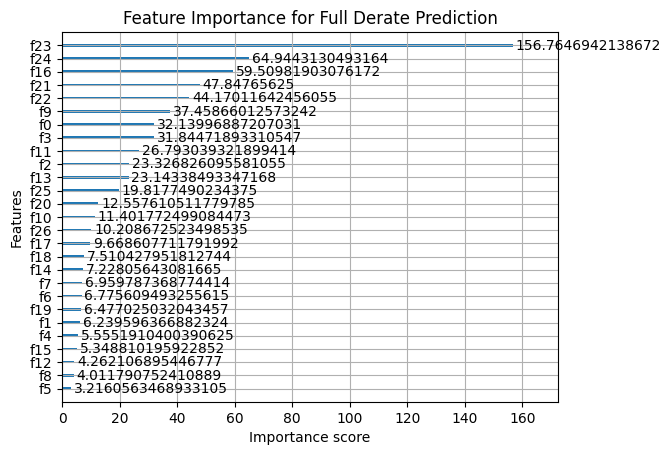

In [38]:
plot_importance_object = plot_importance(xgbc_pipe[1], importance_type='gain')
plt.title('Feature Importance for Full Derate Prediction')
plt.show()

In [39]:
feature_importances = xgbc_pipe[1].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_27_features = feature_importance_df.head(27)

print(top_27_features)

                      Feature  Importance
23     SwitchedBatteryVoltage    0.232181
24                   Throttle    0.096188
16                   FuelRate    0.088139
21               ParkingBrake    0.070866
22                      Speed    0.065420
9                  EngineLoad    0.055479
0                   ecuSource    0.047602
3            AcceleratorPedal    0.047165
11       EngineOilTemperature    0.039683
2       activeTransitionCount    0.034549
13              EngineTimeLtd    0.034277
25         TurboBoostPressure    0.029352
20                 LampStatus    0.018599
10          EngineOilPressure    0.016887
26                    spn_fmi    0.015120
17            FuelTemperature    0.014320
18                  IgnStatus    0.011124
14                  FuelLevel    0.010705
7                 DistanceLtd    0.010308
6       CruiseControlSetSpeed    0.010035
19  IntakeManifoldTemperature    0.009593
1                      active    0.009241
4          BarometricPressure    0

In [40]:
print("Top 27 features:", top_27_features['Feature'].tolist())

Top 27 features: ['SwitchedBatteryVoltage', 'Throttle', 'FuelRate', 'ParkingBrake', 'Speed', 'EngineLoad', 'ecuSource', 'AcceleratorPedal', 'EngineOilTemperature', 'activeTransitionCount', 'EngineTimeLtd', 'TurboBoostPressure', 'LampStatus', 'EngineOilPressure', 'spn_fmi', 'FuelTemperature', 'IgnStatus', 'FuelLevel', 'DistanceLtd', 'CruiseControlSetSpeed', 'IntakeManifoldTemperature', 'active', 'BarometricPressure', 'FuelLtd', 'EngineRpm', 'EngineCoolantTemperature', 'CruiseControlActive']


### Import fresh test data (previously held out) for a fresh round of testing 

In [41]:
test = pd.read_csv('../data/In2019_df_Cat9999999.csv') 

In [42]:
FreshTest_In2019 = test
FreshTest_In2019

,Unnamed: 0.1,Unnamed: 0,RecordID,ESS_Id,EventTimeStamp,eventDescription,actionDescription,ecuSoftwareVersion,ecuSerialNumber,ecuModel,...,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,spn_fmi,is_fullderate,is_fullderate_group,EquipID_Index,time_to_next_SPN5246,time_interval_to_SPN5246_class
0,952775,1062090,1104925,73930906,2019-01-11 12:51:18,High Voltage (Fuel Level),NaN,unknown,unknown,unknown,...,46.52031,NaN,34.4,13.05,96.0_3.0,0,1,301_1,239999976.0,9999999
1,952776,1062091,1104926,73930907,2019-01-11 12:51:18,High Voltage (Left Fuel Level Sensor),NaN,unknown,unknown,unknown,...,46.52031,NaN,34.4,13.05,829.0_3.0,0,1,301_1,239999976.0,9999999
2,952781,1062096,1104931,73934247,2019-01-11 13:11:40,High Voltage (Fuel Level),NaN,unknown,unknown,unknown,...,NaN,NaN,NaN,NaN,96.0_3.0,0,1,301_1,239999976.0,9999999
3,952782,1062097,1104932,73934248,2019-01-11 13:11:40,High Voltage (Left Fuel Level Sensor),NaN,unknown,unknown,unknown,...,NaN,NaN,NaN,NaN,829.0_3.0,0,1,301_1,239999976.0,9999999
4,952809,1062135,1104970,73942005,2019-01-11 13:13:38,High Voltage (Fuel Level),NaN,unknown,unknown,unknown,...,0.00000,NaN,0.0,1.16,96.0_3.0,0,1,301_1,239999976.0,9999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112014,977126,1089938,1137548,80503703,2019-03-16 11:22:32,Incorrect Data J1939 Network #1 Primary Vehicl...,NaN,AAAI000051*AAAM010056*Z091290 *A82J170202A_b...,6232171647,EC80ESP,...,NaN,NaN,NaN,NaN,639.0_2.0,0,0,105437340_0,239999976.0,9999999
112015,977150,1089962,1137572,80509396,2019-03-16 11:24:04,Special Instructions Engine Starter Solenoid L...,NaN,5569997 *E250.e003*,K1243673,FAOM-xx810S-EC3,...,0.00000,NaN,100.0,0.29,1321.0_14.0,0,0,105437340_0,239999976.0,9999999
112016,977151,1089963,1137573,80509397,2019-03-16 11:27:41,NaN,NaN,5569997 *E250.e003*,K1243673,FAOM-xx810S-EC3,...,0.00000,NaN,100.0,0.29,520321.0_13.0,0,0,105437340_0,239999976.0,9999999
112017,978491,1091502,1139112,80907838,2019-03-20 10:57:34,Special Instructions Engine Starter Solenoid L...,NaN,NaN,K1243673,FAOM-xx810S-EC3,...,NaN,NaN,NaN,NaN,1321.0_14.0,0,0,105437340_0,239999976.0,9999999


In [43]:
FreshTest_In2019[['ecuSource', 'LampStatus', 'time_interval_to_SPN5246_class', 'ecuSerialNumber', 'ecuModel', 'ecuMake']] = FreshTest_In2019[['ecuSource', 'LampStatus', 'time_interval_to_SPN5246_class', 'ecuSerialNumber', 'ecuModel', 'ecuMake']].astype('category')

In [44]:
FreshTest_In2019[['activeTransitionCount']] = FreshTest_In2019[['activeTransitionCount']].astype('category')

In [45]:
X_fresh_test = FreshTest_In2019.drop(columns = [    'Unnamed: 0',
                                                    'Unnamed: 0.1',
                                                    'RecordID',
                                                    'ESS_Id',
                                                    'actionDescription',
                                                    'spn',
                                                    'fmi',
                                                    'faultValue',
                                                    'MCTNumber',
                                                    'Latitude',
                                                    'Longitude',
                                                    'is_fullderate',
                                                    'is_fullderate_group',
                                                    'time_to_next_SPN5246',
                                                    'ServiceDistance',
                                                    'EventTimeStamp',
                                                    'eventDescription',
                                                    'EquipmentID',
                                                    'LocationTimeStamp',
                                                    'EquipID_Index',
                                                    'time_interval_to_SPN5246_class',
                                                    'MCTNumber',                                  
                                                    'FaultId',
                                                    'ecuSoftwareVersion',
                                                    'ecuSerialNumber',
                                                    'ecuModel',
                                                    'ecuMake'  
                                                    ]
                                     )  
X_fresh_test

,ecuSource,active,activeTransitionCount,AcceleratorPedal,BarometricPressure,CruiseControlActive,CruiseControlSetSpeed,DistanceLtd,EngineCoolantTemperature,EngineLoad,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,LampStatus,ParkingBrake,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,spn_fmi
0,49,True,126,34.0,14.5,False,0.0,389864.2,145.4,46.0,...,71.6,True,84.2,1279.0,False,46.52031,NaN,34.4,13.05,96.0_3.0
1,49,True,126,34.0,14.5,False,0.0,389864.2,145.4,46.0,...,71.6,True,84.2,1279.0,False,46.52031,NaN,34.4,13.05,829.0_3.0
2,49,False,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,96.0_3.0
3,49,False,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,829.0_3.0
4,49,True,126,0.0,14.5,False,0.0,389870.2,156.2,13.0,...,87.8,True,107.6,1279.0,True,0.00000,NaN,0.0,1.16,96.0_3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112014,11,False,127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50175.0,NaN,NaN,NaN,NaN,NaN,639.0_2.0
112015,3,True,1,0.0,14.5,False,0.0,147893.8,82.4,25.0,...,NaN,True,68.0,63487.0,True,0.00000,NaN,100.0,0.29,1321.0_14.0
112016,3,True,4,0.0,14.5,False,0.0,147893.8,91.4,24.0,...,NaN,True,73.4,63487.0,True,0.00000,NaN,100.0,0.29,520321.0_13.0
112017,3,False,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,63487.0,NaN,NaN,NaN,NaN,NaN,1321.0_14.0


In [46]:
X_fresh_test.shape

(112019, 27)

X_FreshTest_Transformed = ct.transform(X_fresh_test)
X_FreshTest_Transformed

In [47]:
y_fresh_pred = xgbc_pipe.predict(X_fresh_test)

In [48]:
y_fresh_pred

array([4, 4, 4, ..., 4, 4, 4], shape=(112019,))

In [49]:
y_fresh_test = FreshTest_In2019['time_interval_to_SPN5246_class']

In [50]:
y_fresh_test_encoded = le_y.transform(y_fresh_test)

In [51]:
accuracy_score(y_fresh_test_encoded, y_fresh_pred)

0.9762093930493934

In [52]:
confusion_matrix(y_fresh_test_encoded, y_fresh_pred)

array([[     0,      0,      0,      0,   2113],
       [     0,      0,      0,      0,    311],
       [     0,      0,      0,      0,    140],
       [     0,      0,      0,      0,    101],
       [     0,      0,      0,      0, 109354]])

Without ExtraTrees Imputer or SMOTE + XGBClassifier(): 0 precision score for Time Interval Class 1
With HistGradientBoostImputer + SMOTE + XGBClassifier(tree_method = "hist"): 0.421221865 precision score for Time Interval Class 1
With GradientBoostImputer + SMOTE + XGBClassifier(tree_method = "hist"): ___ precision score for Time Interval Class 1
With GradientBoostImputer + SMOTE + XGBClassifier(): ___ precision score for Time Interval Class 1

In [53]:
print(classification_report(y_fresh_test_encoded, y_fresh_pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2113
           1       0.00      0.00      0.00       311
           2       0.00      0.00      0.00       140
           3       0.00      0.00      0.00       101
           4       0.98      1.00      0.99    109354

    accuracy                           0.98    112019
   macro avg       0.20      0.20      0.20    112019
weighted avg       0.95      0.98      0.96    112019



In [54]:
print(f'MSE: {mean_squared_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'RMSE: {root_mean_squared_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'MAE: {mean_absolute_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'MAPE: {mean_absolute_percentage_error(y_fresh_test_encoded, y_fresh_pred)}')
print(f'R2: {r2_score(y_fresh_test_encoded, y_fresh_pred)}')

MSE: 0.33269356091377356
RMSE: 0.5767959439123801
MAE: 0.0871816388291272
MAPE: 339803283822703.56
R2: -0.023379894229289322


fresh_CV_scores = cross_val_score(xgbc_pipe, X_fresh_test, y_fresh_test_encoded, cv=10, scoring='precision_macro')

print('Cross Validation Macro Precision Scores:', fresh_CV_scores)

In [55]:
# submission.to_csv('../data/submission_XGBClassifier_TunedHyperparameter_TargetEncoder_LearningRatePt05_MaxTreeDepth5_MinChild1_Estimators199_TestSizePt001_MostFeatures_ExcludingMapCode.csv', index = False)